## Paso 1: Limpieza de datos

In [1]:
# Importo bibliotecas
import pandas as pd
import numpy as np

In [3]:
# Cargo el dataset
df = pd.read_csv('creditcard.csv')

In [4]:
# Verifico las primeras filas
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# Resumen estadístico
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
# Verifico valores nulos
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Verifico distribución de clases (fraude/no fraude)
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


### Resultados esperados:
  - El dataset tiene 31 columnas (Time, V1, V2, ..., Amount, Class).
  - La columna "Class" indica si una transacción es fraudulenta (1) o no (0).
  - Hay un desbalance significativo entre las clases (muy pocas transacciones fraudulentas).
### Acciones:
  - No hay valores nulos, así que no es necesario imputar datos.
  - Dado el desbalance, aplicare técnicas como SMOTE o undersampling.

## Paso 2: Exploración de datos

In [8]:
# Realizo un análisis exploratorio de datos (EDA) para entender mejor el dataset.
import matplotlib.pyplot as plt
import seaborn as sns

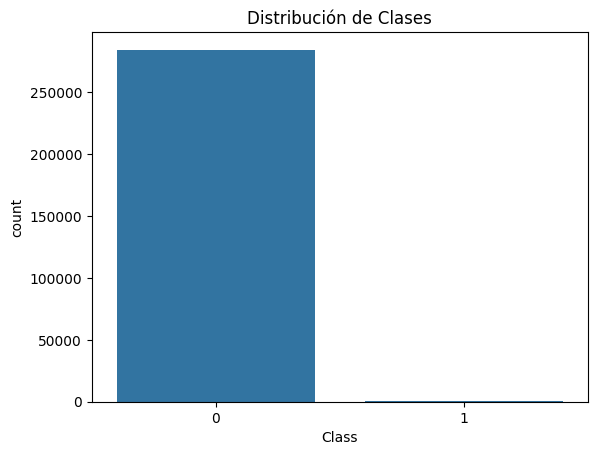

In [9]:
# Distribución de transacciones fraudulentas vs no fraudulentas
sns.countplot(x='Class', data=df)
plt.title('Distribución de Clases')
plt.show()

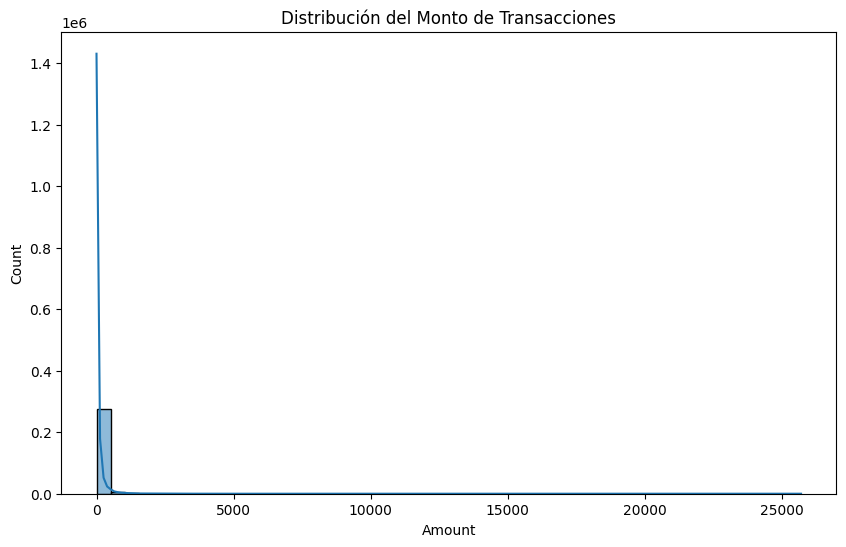

In [10]:
# Distribución del monto de las transacciones
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribución del Monto de Transacciones')
plt.show()

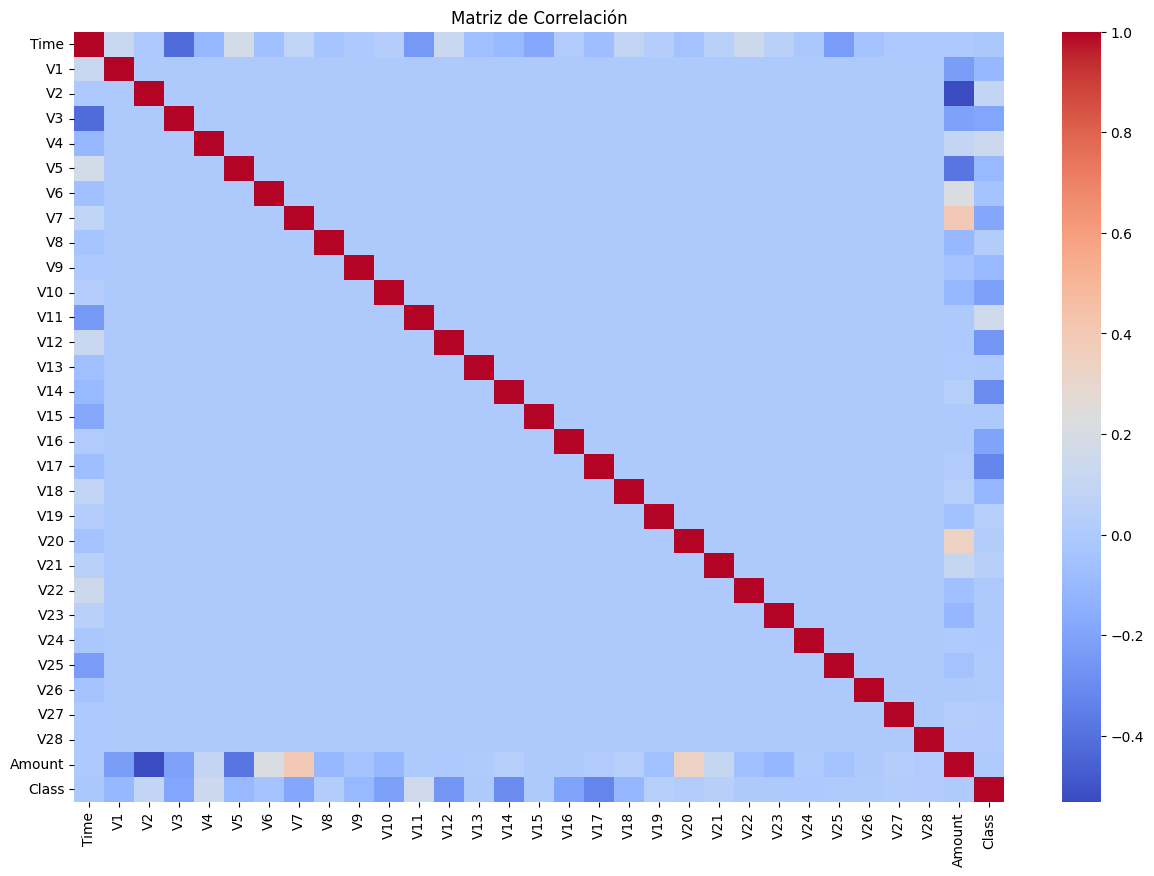

In [11]:
# Correlación entre variables
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### Observaciones:
  - La mayoría de las transacciones son no fraudulentas.
  - El monto de las transacciones fraudulentas tiende a ser menor.
  - Las variables V1, V2, ..., V28 están anonimizadas, pero pueden ser útiles para entrenar modelos.

## Paso 3: Preprocesamiento

In [12]:
# Preparo los datos para entrenar un modelo de machine learning.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Separo características y etiquetas
X = df.drop(columns=['Class'])
y = df['Class']

In [14]:
# Divido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Escalo las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Paso 4: Entrenamiento del modelo

In [20]:
# Entreno un modelo para predecir transacciones fraudulentas.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [18]:
# Hacer predicciones
y_pred = model.predict(X_test_scaled)

IndexError: list index out of range

In [19]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

NameError: name 'y_pred' is not defined

## Resultados esperados:
  - El modelo tendrá un buen rendimiento en la clase mayoritaria (no fraude).
  - Para mejorar la detección de fraudes, podemos ajustar hiperparámetros o usar técnicas como SMOTE.